# Home Assignment No. 3

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

! pip install GPy==1.9.9
import GPy
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

from tqdm import tqdm
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.model_selection import cross_validate as cv

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from sklearn.neighbors import NearestNeighbors
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

     |████████████████████████████████| 995 kB 21.5 MB/s 
     |████████████████████████████████| 71 kB 8.4 MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp37-cp37m-linux_x86_64.whl size=2627271 sha256=8adeaae14296e7bac92ca34646685cb80c5e3b6a99c13b321d3bc4c0d9c3d075
  Stored in directory: /root/.cache/pip/wheels/e4/05/38/b84c6bec7ea9dc623cdbdb6203b55b3abe7a7020a992f2064c
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=872adb38592c6953705576b385a0ed43968ba62fa0078c104d8ca055eaa50bc2
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [4]:
data.dropna(inplace=True)

In [5]:
y = np.array(data.values)
X = np.array(data.index)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [7]:
### BEGIN SOLUTION (do not delete this comment!)

scaler = StandardScaler()
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

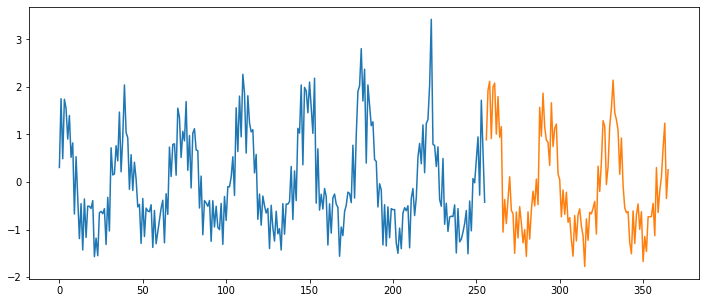

In [8]:
### BEGIN SOLUTION (do not delete this comment!)

plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(X_train, y_train)
plt.plot(X_test, y_test);

### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

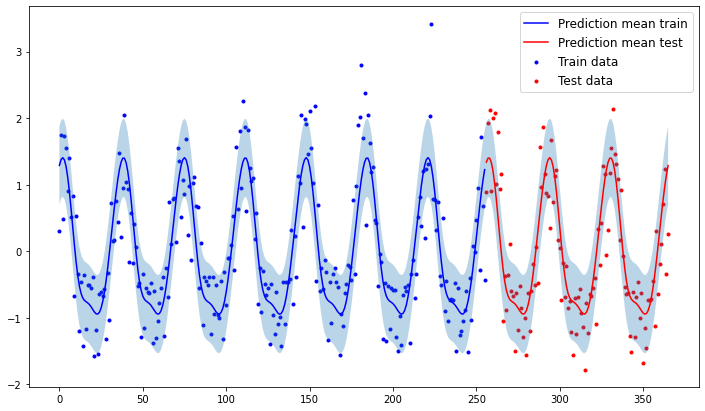

In [9]:
### BEGIN SOLUTION (do not delete this comment!)

kernel = GPy.kern.Poly(1, order=3) * GPy.kern.RBF(1, lengthscale=.1) + GPy.kern.StdPeriodic(1, period=35) + GPy.kern.White(1)

model = GPy.models.GPRegression(X_train, y_train, kernel)
model.optimize(messages=False)

plt.rcParams['figure.figsize'] = (12, 7)
plt.scatter(X_train, y_train, marker='.', color='b', label='Train data')
plt.scatter(X_test, y_test, marker='.', color='red', label='Test data')

plt.plot(X_train, model.predict(X_train)[0], 'b', label='Prediction mean train')
plt.plot(X_test, model.predict(X_test)[0], 'r', label='Prediction mean test')

ci_95 = stats.norm.interval(0.95, loc=model.predict(X.reshape(-1,1))[0], scale=model.predict(X.reshape(-1,1))[1])

plt.fill_between(X.ravel(), ci_95[0].ravel(), ci_95[1].ravel(), alpha=0.3);
# plt.fill_between(X.ravel(), (model.predict(X.reshape(-1,1))[0] - model.predict(X.reshape(-1,1))[1]).ravel(), (model.predict(X.reshape(-1,1))[0] + model.predict(X.reshape(-1,1))[1]).ravel(), alpha=0.3);
plt.legend(fontsize=12);

### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

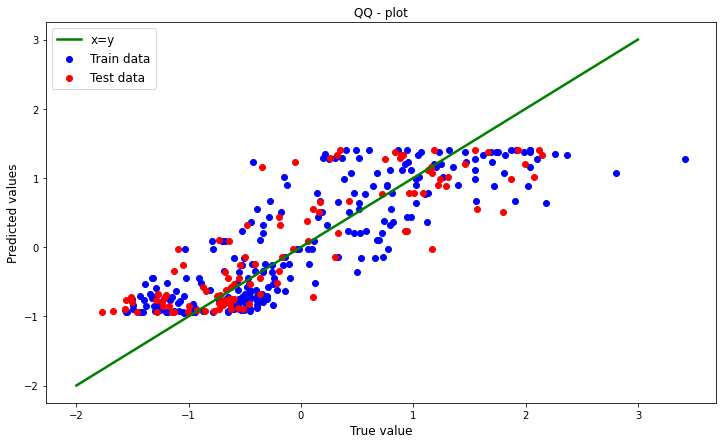

In [10]:

### BEGIN SOLUTION (do not delete this comment!)

plt.plot(np.linspace(-2, 3, 400), np.linspace(-2, 3, 400), 'g', label='x=y', linewidth=2.5)
plt.scatter(y_train, model.predict(X_train)[0], marker='o', color='b', label='Train data')
plt.scatter(y_test, model.predict(X_test)[0], marker='o', color='red', label='Test data')

plt.xlabel('True value', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title('QQ - plot', fontsize=12)
plt.legend(fontsize=12);

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [11]:
### BEGIN SOLUTION (do not delete this comment!)

pred, _ = model.predict(X_test)
print('R2-score:', r2_score(y_test, pred))

### END SOLUTION (do not delete this comment!)

R2-score: 0.7216456697311613


## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

100%|██████████| 200/200 [09:15<00:00,  2.78s/it]


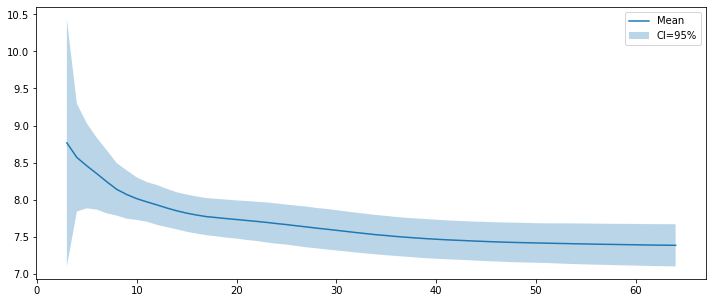

In [13]:
### BEGIN SOLUTION (do not delete this comment!)

# I took the source code as it suggested in the task.
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results



k1 = 3
k2 = 64
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=200,
                             verbose=1, 
                             random_state=11,
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

mean = np.mean(intdim_k_repeated, axis=0)
std = intdim_k_repeated.std(axis=0)

plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(list(range(k1, k2+1)), mean, label='Mean')

ci_95 = stats.norm.interval(0.95, loc=mean, scale=std)

plt.fill_between(list(range(k1, k2+1)), ci_95[0], ci_95[1], alpha=0.3, label='CI=95%');
# plt.fill_between(list(range(k1, k2+1)), mean - 2 * std, mean + 2 * std, alpha=0.3, label='CI=95%');
plt.legend();

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

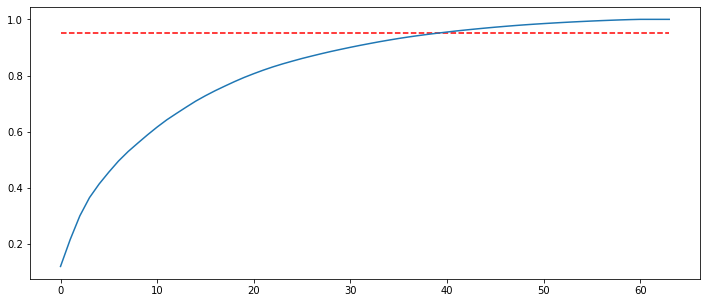

In [14]:
### BEGIN SOLUTION (do not delete this comment!)

pca = PCA()
pca.fit(data)

plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(list(range(data.shape[1])), [0.95] * data.shape[1], '--r')
plt.plot(list(range(data.shape[1])), np.cumsum(pca.explained_variance_ratio_));

### END SOLUTION (do not delete this comment!)

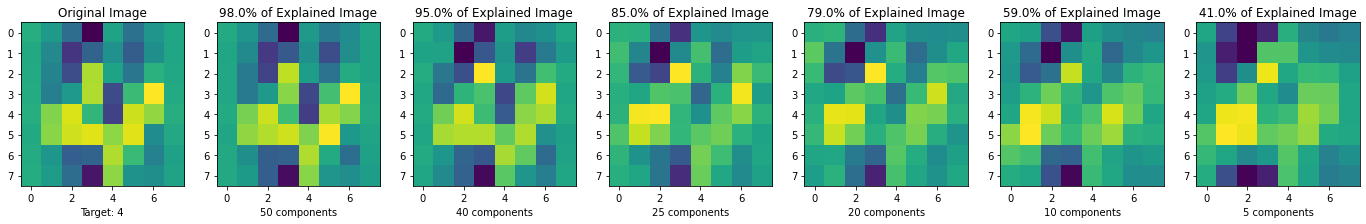

In [15]:
### BEGIN SOLUTION (do not delete this comment!)

n_comp = [50, 40, 25, 20, 10, 5]
data_ind = 4
fig, axes = plt.subplots(1, 7, figsize=(24,15))
axes.ravel()

axes[0].imshow(data[data_ind].reshape(8, 8))
axes[0].set_title('Original Image')
axes[0].set_xlabel(f'Target: {dg.target[data_ind]}');

for i, n in enumerate(n_comp):
    i += 1
    pca_n = PCA(n_components=n)
    data_tr = pca_n.fit_transform(data)

    axes[i].imshow(pca_n.inverse_transform(data_tr)[data_ind].reshape(8, 8))
    cum_sum = np.round(np.cumsum(pca_n.explained_variance_ratio_)[-1], 2)
    axes[i].set_title(f'{cum_sum * 100}% of Explained Image')
    axes[i].set_xlabel(f'{n} components');

### END SOLUTION (do not delete this comment!)


### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [16]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [17]:
### BEGIN SOLUTION (do not delete this comment!)
n_comp = 25
target = dg.target
log_reg = LogisticRegression(random_state=42, n_jobs=-1)

pca_2 = PCA(n_components=n_comp, random_state=42)
ica = FastICA(n_components=n_comp, max_iter=1000, random_state=42)
isomap = Isomap(n_components=n_comp, n_jobs=-1)

data_pca = pca_2.fit_transform(data)
data_ica = ica.fit_transform(data)
data_isomap = isomap.fit_transform(data)

acc_pca = []
acc_ica = []
acc_isomap = []

list_data = [data_pca, data_ica, data_isomap]
list_acc = [acc_pca, acc_ica, acc_isomap]
list_names = ['PCA', 'FastICA', 'Isomap']
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

for d, acc, name in zip(list_data, list_acc, list_names):
    for train_index, test_index in rkf.split(d):
        X_train, X_test = d[train_index], d[test_index]
        y_train, y_test = target[train_index], target[test_index]

        log_reg.fit(X_train, y_train)
        y_hat = log_reg.predict(X_test)
        acc.append(accuracy_score(y_test, y_hat))
    print(f'{name}: {np.mean(acc)}')

### END SOLUTION (do not delete this comment!)


PCA: 0.9476906014649747
FastICA: 0.8896280821211183
Isomap: 0.964014237078304


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [18]:
print('Isomap vs FastICA:', stats.ttest_rel(acc_isomap, acc_ica))
print('Isomap vs PCA:', stats.ttest_rel(acc_isomap, acc_pca))

Isomap vs FastICA: Ttest_relResult(statistic=19.97974977742522, pvalue=1.0902086587022994e-11)
Isomap vs PCA: Ttest_relResult(statistic=4.351242053553592, pvalue=0.0006643980924180301)


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

Null hypothesis was that the results of PCA/FastICA and Isomap are equal. Small value of p-value reject this. The results in case of PCA are quite natural, since Isomap represents a non-linear dimensionality reduction method with geodesic distance. So, PCA is an appropriate choice with assumption of linear structure of data.

If comapre FastICA and Isomap the first one has strong assumption that components are independent (and also non-Gaussian). It may leads to worse performance. Also FastICA is iterative and it might not converge to the best solution yet.

*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [19]:
import numpy as np

In [20]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [21]:
### BEGIN SOLUTION (do not delete this comment!)

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
n_comp = 50
pca_3 = PCA(n_components=n_comp, random_state=42)

pca_3.fit(x_train)
x_train_tr = pca_3.transform(x_train)
x_test_tr = pca_3.transform(x_test)

knn.fit(x_train_tr, y_train)
y_hat = knn.predict(x_test_tr)

print(f'Test accuracy: {accuracy_score(y_test, y_hat)}')

### END SOLUTION (do not delete this comment!)

Test accuracy: 0.9328


## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [22]:
import numpy as np

True number of clusters is 15


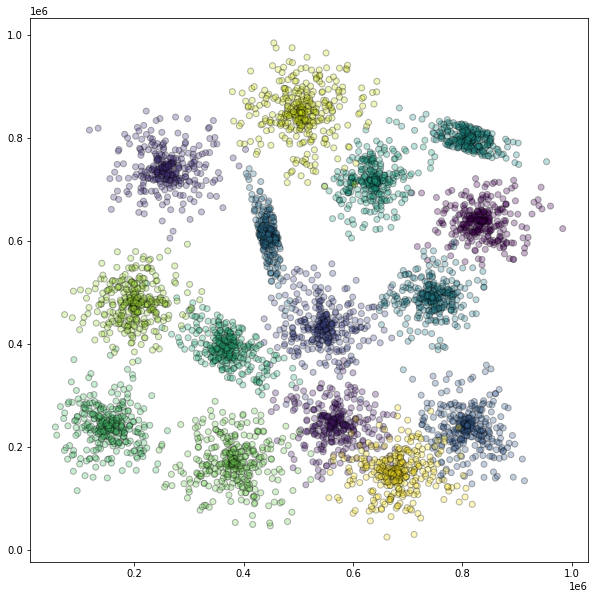

In [23]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [25]:
### BEGIN SOLUTION (do not delete this comment!)

true_clust = 15

km_params = {'algorithm': ['elkan', 'auto', 'full'], 'max_iter': list(range(150, 450, 20)), 'tol': [1e-2, 1e-3, 1e-4, 1e-5]}
gm_params = {'covariance_type': ['full', 'tied', 'diag', 'spherical'], 'reg_covar': [1e-5, 1e-6, 1e-7], 'tol': [1e-2, 1e-3, 1e-4],
             'n_init': [1, 2, 5], 'init_params': ['kmeans', 'random']}
birch_params = {'threshold': [0.1, 0.3, 0.5, 0.8, 1.], 'branching_factor': [30, 40, 50, 60, 70]}
agg_clust_params = {'linkage': ['complete', 'average', 'single'], 'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']}

km_params_g = ParameterGrid(km_params)
gm_params_g = ParameterGrid(gm_params)
birch_params_g = ParameterGrid(birch_params)
agg_clust_params_g = ParameterGrid(agg_clust_params)
             
names = ['KMeans', 'GaussianMixture', 'Birch', 'AgglomerativeClustering']
params = [km_params_g, gm_params_g, birch_params_g, agg_clust_params_g]
params_dict = {}

kf = KFold(n_splits=5)

for n, par_set in zip(names[:-1], params[:-1]):
    list_p_silh = []
    list_p_mi = []

    for p in par_set:
        list_silh = []
        list_mi = []

        for train_index, test_index in kf.split(points):
            X_train, X_test = points[train_index], points[test_index]
            y_train, y_test = labels[train_index], labels[test_index]

            if n == 'KMeans':
                m = KMeans(n_clusters=true_clust, **p, random_state=42)
            elif n == 'GaussianMixture':
                m = GaussianMixture(n_components=true_clust, **p, random_state=42)
            elif n == 'Birch':
                m = Birch(n_clusters=true_clust, **p)
            
            m.fit(X_train)
            y_hat = m.predict(X_test)

            list_silh.append(silhouette_score(X_test, y_hat))
            list_mi.append(mutual_info_score(y_test, y_hat))
        list_p_silh.append(np.mean(list_silh))
        list_p_mi.append(np.mean(list_mi))

    best_par_ind = np.argmax(list_p_mi)
    params_dict[n] = par_set[best_par_ind]  

list_silh = []
list_mi = []

for p in agg_clust_params_g:
    m = AgglomerativeClustering(n_clusters=true_clust, **p)

    y_hat = m.fit_predict(points)
    list_silh.append(silhouette_score(points, y_hat))
    list_mi.append(mutual_info_score(labels, y_hat))

ind_best = np.argmax(list_mi)
params_dict['AgglomerativeClustering'] = agg_clust_params_g[ind_best]


for n in names:
    p = params_dict[n]

    if n == 'KMeans':
        m = KMeans(n_clusters=true_clust, **p, random_state=42)
    elif n == 'GaussianMixture':
        m = GaussianMixture(n_components=true_clust, **p, random_state=42)
    elif n == 'Birch':
        m = Birch(n_clusters=true_clust, **p)
    elif n == 'AgglomerativeClustering':
        m = AgglomerativeClustering(n_clusters=true_clust, **p)

    y_hat = m.fit_predict(points)

    print(n)
    print(f'  Silhouette_score={silhouette_score(points, y_hat)}')
    print(f'  Mutual_info_score={mutual_info_score(labels, y_hat)}')   
    print(f'  Best params:{p}', end='\n\n') 

### END SOLUTION (do not delete this comment!)

KMeans
  Silhouette_score=0.6261563743783776
  Mutual_info_score=2.5601644750473738
  Best params:{'tol': 0.01, 'max_iter': 150, 'algorithm': 'elkan'}

GaussianMixture
  Silhouette_score=0.6227621943669716
  Mutual_info_score=2.5691927298534587
  Best params:{'tol': 0.01, 'reg_covar': 1e-05, 'n_init': 1, 'init_params': 'kmeans', 'covariance_type': 'full'}

Birch
  Silhouette_score=0.6075939207380119
  Mutual_info_score=2.5077832875665407
  Best params:{'threshold': 0.1, 'branching_factor': 30}

AgglomerativeClustering
  Silhouette_score=0.6091772373449134
  Mutual_info_score=2.519454846864759
  Best params:{'linkage': 'average', 'affinity': 'euclidean'}



2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

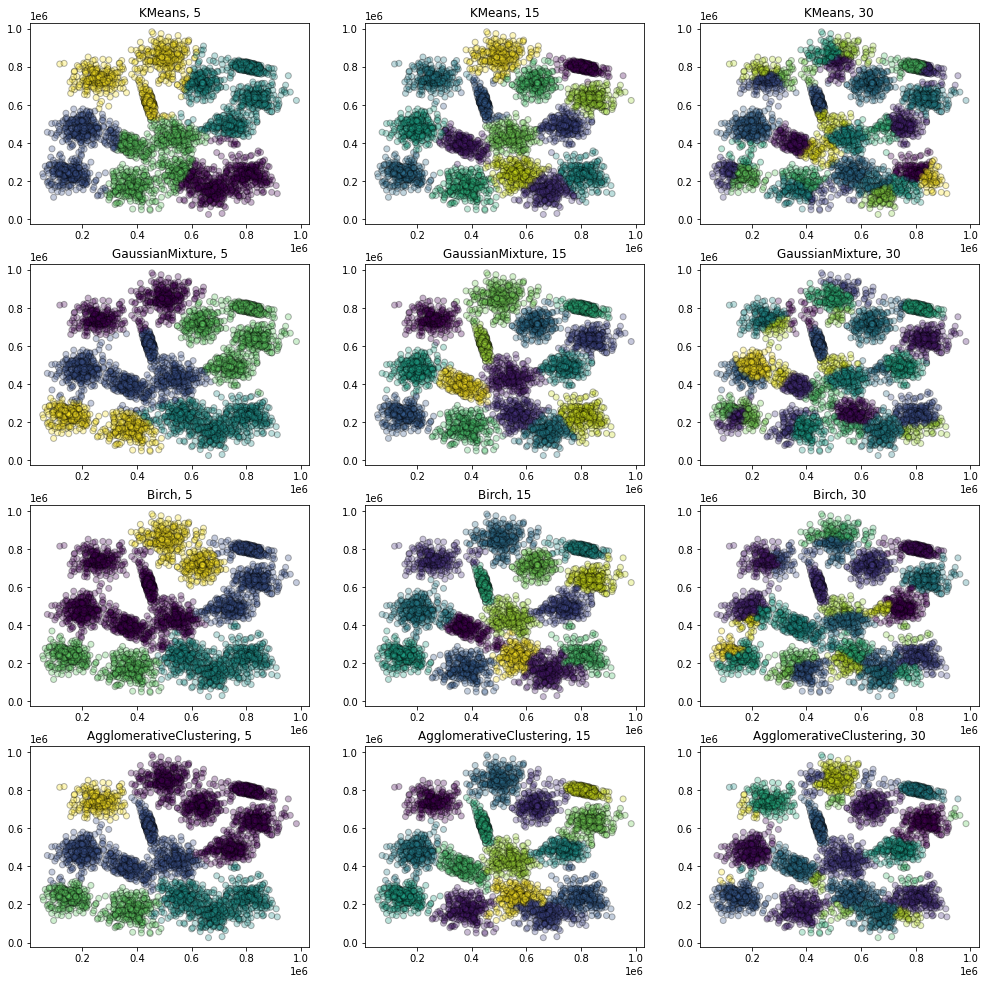

In [26]:
## BEGIN SOLUTION (do not delete this comment!)

clust = [5, 15, 30]

fig, axes = plt.subplots(4, 3, figsize=(17, 17))

for i, n in enumerate(names):
    for j, c in enumerate(clust):
        p = params_dict[n]

        if n == 'KMeans':
            m = KMeans(n_clusters=c, **p, random_state=42)
        elif n == 'GaussianMixture':
            m = GaussianMixture(n_components=c, **p, random_state=42)
        elif n == 'Birch':
            m = Birch(n_clusters=c, **p)
        elif n == 'AgglomerativeClustering':
            m = AgglomerativeClustering(n_clusters=c, **p)

        y_hat = m.fit_predict(points)
        axes[i, j].scatter(points[:,0], points[:,1], c=y_hat, alpha=0.3, edgecolor='k')
        axes[i, j].set_title(f'{n}, {c}')

### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


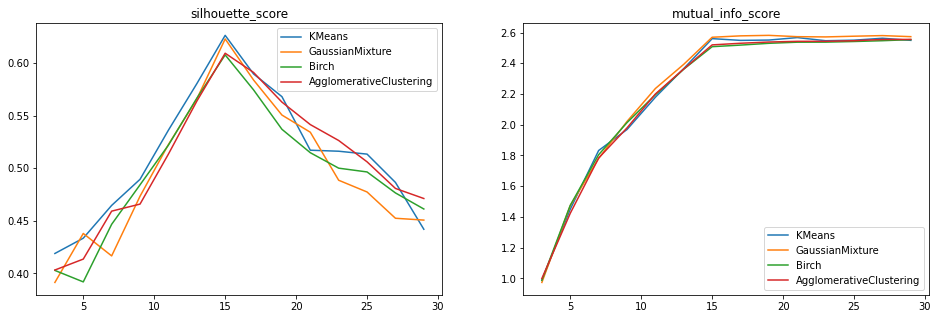

In [27]:
### BEGIN SOLUTION (do not delete this comment!)

silh_km, silh_gm, silh_birch, silh_aggl = [], [], [], []
mi_km, mi_gm, mi_birch, mi_aggl = [], [], [], []

clust_1 = list(range(3, 31, 2))

for i, n in enumerate(names):
    for j, c in enumerate(clust_1):
        p = params_dict[n]

        if n == 'KMeans':
            m = KMeans(n_clusters=c, **p, random_state=42)
            y_hat = m.fit_predict(points)
            silh_km.append(silhouette_score(points, y_hat))
            mi_km.append(mutual_info_score(labels, y_hat))

        elif n == 'GaussianMixture':
            m = GaussianMixture(n_components=c, **p, random_state=42)
            y_hat = m.fit_predict(points)
            silh_gm.append(silhouette_score(points, y_hat))
            mi_gm.append(mutual_info_score(labels, y_hat))

        elif n == 'Birch':
            m = Birch(n_clusters=c, **p)
            y_hat = m.fit_predict(points)
            silh_birch.append(silhouette_score(points, y_hat))
            mi_birch.append(mutual_info_score(labels, y_hat))

        elif n == 'AgglomerativeClustering':
            m = AgglomerativeClustering(n_clusters=c, **p)
            y_hat = m.fit_predict(points)
            silh_aggl.append(silhouette_score(points, y_hat))
            mi_aggl.append(mutual_info_score(labels, y_hat))
        

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(clust_1, silh_km, label='KMeans')
axes[0].plot(clust_1, silh_gm, label='GaussianMixture')
axes[0].plot(clust_1, silh_birch, label='Birch')
axes[0].plot(clust_1, silh_aggl, label='AgglomerativeClustering')

axes[1].plot(clust_1, mi_km, label='KMeans')
axes[1].plot(clust_1, mi_gm, label='GaussianMixture')
axes[1].plot(clust_1, mi_birch, label='Birch')
axes[1].plot(clust_1, mi_aggl, label='AgglomerativeClustering')

axes[0].set_title('silhouette_score')
axes[1].set_title('mutual_info_score')

axes[0].legend()
axes[1].legend();

### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [28]:
### BEGIN SOLUTION (do not delete this comment!)

N = 200
sample_size = 100
clust_number = list(range(7, 23))

silh_dict_var = {}
silh_dict_CI = {}
silh_dict_mean = {}

for c in clust_number:
    silh_list = []

    for i in range(N):
        index = np.random.randint(0, points.shape[0], sample_size)
        sample = points[index, :]
        model_3 = AgglomerativeClustering(n_clusters=c, linkage='average', affinity='euclidean')
        y_hat = model_3.fit_predict(sample)
        silh_list.append(silhouette_score(sample, y_hat))
        # mi_list.append(mutual_info_score(labels[index], y_hat))

    silh_dict_mean[c] = np.mean(silh_list)
    silh_dict_CI[c] = stats.norm.interval(0.95, loc=np.mean(silh_list), scale=np.std(silh_list)/np.sqrt(N))
    silh_dict_var[c] = np.std(silh_list) ** 2 / N

### END SOLUTION (do not delete this comment!)

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

Number of clusters: 7
  Mean silhouette_score: 0.46430422444368796
  Variance of silhouette_score: 4.5794880865162455e-06
  CI of silhouette_score: (0.46010995276624367, 0.46849849612113226)

Number of clusters: 8
  Mean silhouette_score: 0.4898995763306081
  Variance of silhouette_score: 4.603120753578466e-06
  CI of silhouette_score: (0.4856944962099024, 0.4941046564513138)

Number of clusters: 9
  Mean silhouette_score: 0.507436915230062
  Variance of silhouette_score: 4.4836415911290145e-06
  CI of silhouette_score: (0.5032867676978562, 0.5115870627622677)

Number of clusters: 10
  Mean silhouette_score: 0.5328451415699877
  Variance of silhouette_score: 5.461607100041513e-06
  CI of silhouette_score: (0.5282646897615282, 0.5374255933784473)

Number of clusters: 11
  Mean silhouette_score: 0.5542058275818218
  Variance of silhouette_score: 4.813244211487786e-06
  CI of silhouette_score: (0.5499058416013359, 0.5585058135623077)

Number of clusters: 12
  Mean silhouette_score: 0.5776

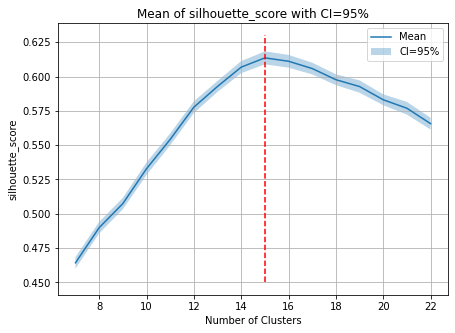

In [29]:
## BEGIN SOLUTION (do not delete this comment!)

for c in clust_number:
    print('Number of clusters:', c)
    print('  Mean silhouette_score:', silh_dict_mean[c])
    print('  Variance of silhouette_score:', silh_dict_var[c])
    print('  CI of silhouette_score:', silh_dict_CI[c], end='\n\n')  


CI_bot = np.array(list(silh_dict_CI.values()))[:, 0]
CI_up = np.array(list(silh_dict_CI.values()))[:, 1]
mean = list(silh_dict_mean.values())

plt.rcParams['figure.figsize'] = (7, 5)

plt.plot(clust_number, mean, label='Mean')
plt.fill_between(clust_number, CI_bot, CI_up, alpha=.3, label='CI=95%')
plt.plot([clust_number[np.argmax(mean)]] * 100, np.linspace(0.45, 0.63, 100), '--r')

plt.title('Mean of silhouette_score with CI=95%')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')
plt.legend()
plt.grid()

### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [30]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

Contamination: 0.01693743518838576


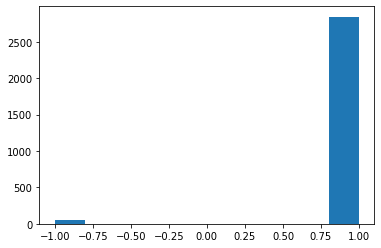

In [31]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data
test_y[test_y == 1] = -1
test_y[test_y == 0] = 1
contamination = np.where(test_y == -1)[0].shape[0] / test_y.shape[0]
print('Contamination:', contamination)
plt.hist(test_y);

### END SOLUTION (do not delete this comment!)

In [32]:
### BEGIN SOLUTION (do not delete this comment!)

# Choose three anomaly detection models

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

for i in [0.1, 1, 10]:
    # >>> your solution here <<<
    local_of = LocalOutlierFactor(contamination=i*contamination, novelty=True, n_jobs=-1)
    i_forest = IsolationForest(contamination=i*contamination, random_state=42, n_jobs=-1)
    svm = OneClassSVM(nu=i*contamination)

    models = [local_of, i_forest, svm]
    names = ['LocalOutlierFactor', 'IsolationForest', 'OneClassSVM']

    print(f'Contamination: {np.round(i*contamination, 4)}')
    for n, m in zip(names, models):
        m.fit(train_X.values)
        print(f' {n}')
        print(f'  roc_auc_score: {np.round(roc_auc_score(test_y, m.predict(test_X.values)), 4)}')
        print(f'  precision_score: {np.round(precision_score(test_y, m.predict(test_X.values)), 4)}')
    print()
print('\n================================\nThe best algorithm is IsolationForest')
### END SOLUTION (do not delete this comment!)

Contamination: 0.0017
 LocalOutlierFactor
  roc_auc_score: 0.4991
  precision_score: 0.983
 IsolationForest
  roc_auc_score: 0.5408
  precision_score: 0.9844
 OneClassSVM
  roc_auc_score: 0.4986
  precision_score: 0.983

Contamination: 0.0169
 LocalOutlierFactor
  roc_auc_score: 0.4997
  precision_score: 0.9831
 IsolationForest
  roc_auc_score: 0.7723
  precision_score: 0.9923
 OneClassSVM
  roc_auc_score: 0.4887
  precision_score: 0.9827

Contamination: 0.1694
 LocalOutlierFactor
  roc_auc_score: 0.5057
  precision_score: 0.9833
 IsolationForest
  roc_auc_score: 0.8723
  precision_score: 0.9979
 OneClassSVM
  roc_auc_score: 0.5103
  precision_score: 0.9835


The best algorithm is IsolationForest


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [33]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
clf_1 = XGBClassifier(n_jobs=-1, random_state=42)
clf_2 = LogisticRegression(random_state=42, n_jobs=-1)
clf_3 = KNeighborsClassifier(n_jobs=-1)
clf_4 = DecisionTreeClassifier(max_depth=3)

models = [clf_1, clf_2, clf_3, clf_4]
names = ['XGBClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier']

smote = SMOTE(random_state=42)

roc_auc_scores = [] 
pr_score = []

for n, m in zip(names, models):
    for train_index, test_index in skf.split(test_X, test_y):
        # >>> your solution here <<<
        X_train_f, X_test_f = test_X.iloc[train_index], test_X.iloc[test_index]
        y_train_f, y_test_f = test_y.iloc[train_index], test_y.iloc[test_index]

        X_train_r, y_train_r = smote.fit_resample(X_train_f, y_train_f)

        m.fit(X_train_r, y_train_r)
        y_hat = m.predict(X_test_f)
        roc_auc_scores.append(roc_auc_score(y_test_f, y_hat))
        pr_score.append(precision_score(y_test_f, y_hat))

    print(f'Model: {n}\n  roc_auc_score: mean={np.mean(roc_auc_scores)}, std={np.std(roc_auc_scores)}\n  precision_score: mean={np.mean(pr_score)}, std={np.std(pr_score)}\n')
    
### END SOLUTION (do not delete this comment!)

Model: XGBClassifier
  roc_auc_score: mean=0.9485927847788485, std=0.06709863581679965
  precision_score: mean=0.9982443612725304, std=0.0023510524107768515

Model: LogisticRegression
  roc_auc_score: mean=0.9448131331850753, std=0.0664222226701051
  precision_score: mean=0.9982343624024704, std=0.002364106318075804

Model: KNeighborsClassifier
  roc_auc_score: mean=0.8334121983362162, std=0.18740327658695294
  precision_score: mean=0.9950483248873276, std=0.006399587744514932

Model: DecisionTreeClassifier
  roc_auc_score: mean=0.8486571843340747, std=0.17388015367419904
  precision_score: mean=0.9955680449611073, std=0.0058824015520683925



Try to enhance the classifier performance using Anomaly detection methods

In [34]:
from scipy.stats.stats import HistogramResult
### BEGIN SOLUTION (do not delete this comment!)

i_forest_2 = IsolationForest(bootstrap=True, n_estimators=200, n_jobs=-1, random_state=42)

roc_auc_scores_hard = [] 
pr_score_hard = []

roc_auc_scores_soft = [] 
pr_score_soft = []

print('!Look at "Soft voting" results!\n===============================\n')
for n, m in zip(names, models):
    for train_index, test_index in skf.split(test_X, test_y):
        # >>> your solution here <<<
        X_train_f, X_test_f = test_X.iloc[train_index, :], test_X.iloc[test_index, :]
        y_train_f, y_test_f = test_y.iloc[train_index], test_y.iloc[test_index]

        X_train_r, y_train_r = smote.fit_resample(X_train_f, y_train_f)

        i_forest_2.fit(np.vstack((train_X, X_train_f)))
        m.fit(X_train_r, y_train_r)
        
        y_hat_anom_det = i_forest_2.predict(X_test_f.values)
        y_hat_clf = m.predict(X_test_f)
        
        hard_vot = np.logical_and(y_hat_anom_det==-1, y_hat_clf==-1)
        y_hat_hard = np.where(hard_vot==True, -1, 1)
        roc_auc_scores_hard.append(roc_auc_score(y_test_f, y_hat_hard))
        pr_score_hard.append(precision_score(y_test_f, y_hat_hard))

        soft_vot = np.logical_or(y_hat_anom_det==-1, y_hat_clf==-1)
        y_hat_soft = np.where(soft_vot==True, -1, 1)
        roc_auc_scores_soft.append(roc_auc_score(y_test_f, y_hat_soft))
        pr_score_soft.append(precision_score(y_test_f, y_hat_soft))

    print(f'Model: {n}')
    print(f'  Hard voting\nroc_auc_score: mean={np.mean(roc_auc_scores_hard)}, std={np.std(roc_auc_scores_hard)}\nprecision_score: mean={np.mean(pr_score_hard)}, std={np.std(pr_score_hard)}', end='\n\n')
    print(f'  Soft voting\nroc_auc_score: mean={np.mean(roc_auc_scores_soft)}, std={np.std(roc_auc_scores_soft)}\nprecision_score: mean={np.mean(pr_score_soft)}, std={np.std(pr_score_soft)}')
    print('-------------------------------------------------------------------\n\n')
### END SOLUTION (do not delete this comment!)

!Look at "Soft voting" results!

Model: XGBClassifier
  Hard voting
roc_auc_score: mean=0.8319730664689894, std=0.0832849171264198
precision_score: mean=0.9944079370362051, std=0.002295840300982468

  Soft voting
roc_auc_score: mean=0.9459346429453918, std=0.06881604879388281
precision_score: mean=0.9985480416094135, std=0.0024018832714320535
-------------------------------------------------------------------


Model: LogisticRegression
  Hard voting
roc_auc_score: mean=0.82662157153447, std=0.08821113339485774
precision_score: mean=0.994229452571376, std=0.0025199615781545366

  Soft voting
roc_auc_score: mean=0.9475064862861379, std=0.0667618832208837
precision_score: mean=0.9987252337716453, std=0.002377682327618348
-------------------------------------------------------------------


Model: KNeighborsClassifier
  Hard voting
roc_auc_score: mean=0.7740762704884275, std=0.12664681106764894
precision_score: mean=0.9924216317228836, std=0.004132253314502283

  Soft voting
roc_auc_score

Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*

I found out that anomaly detection really can enhance performance of classificatiors. Only such complex and good algorithm as XGBoostClassifier did not show the increase in roc_auc_score. I assume, that with better parameters' tuning and more complex ensemlbe approach it may also provide the growth in performance.

Also I tried two approaches. "Soft voting" really helped to achive better performance. I think, anomaly detection has to be used to identify some not common outliers. From my side, in these kind of enembles anomaly detection should complement the results of classificator but not "match" with them like in "hard voting" approach.

*END SOLUTION (do not delete this comment!)*